In [1]:
#Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import seaborn as sns

#Path your csv files
farm_path = "datasets/rob_clean_farm.csv"
startup_path = "datasets/rob_Best_Cities_for_Startups.csv"

#Create the df from the csv files you are using
farm_df = pd.read_csv(farm_path)
startup_df = pd.read_csv(startup_path)

In [2]:
#Start the real data cleanup process
farm_df.fillna("N/A", axis=0, inplace=True)

#This will fix all the names in the data to workable names
farm_df.loc[farm_df['city'].str.contains('New York', case=False), 'city'] = 'New York'
farm_df.loc[farm_df['city'].str.contains('Boston', case=False), 'city'] = 'Boston'
farm_df.loc[farm_df['city'].str.contains('Los Angeles', case=False), 'city'] = 'Los Angeles'
farm_df.loc[farm_df['city'].str.contains('Seattle', case=False), 'city'] = 'Seattle'
farm_df.loc[farm_df['city'].str.contains('San Francisco', case=False), 'city'] = 'San Francisco'
farm_df = farm_df[farm_df['city'].str.contains("South San Francisco")==False]
farm_df

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,California,1005272,Adelanto Stadium Farmers Market,N/A,N/A,N/A,N/A,N/A,Hwy 395 & Rancho Drive,Victorville,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1,California,1009019,Alameda Farmers' Market,http://www.pcfma.com,https://www.facebook.com/AlamedaFarmersMarket,N/A,N/A,N/A,Haight and Webster St.,Alameda,...,N,N,Y,N,N,N,N,N,N,6/27/2016 12:57
2,California,1008835,Alisal Certified Farmers' Market,http://www.everyonesharvest.org,https://www.facebook.com/EveryonesHarvest,N/A,N/A,N/A,632 East Alisal Street,Salinas,...,N,N,Y,N,N,N,N,N,N,6/27/2016 15:24
3,California,1009998,Altadena Farmers' Market,http://www.altadenafarmersmarket.com,https://www.facebook.com/AltadenaFarmersMarket,https://twitter.com/AltadenaFM,N/A,http://altadenafm.tumblr.com,600 W. Palm Street,Altadena,...,Y,N,Y,Y,Y,Y,N,N,N,4/22/2014 13:29
4,California,1011421,Alum Rock Village Farmers' Market,http://www.pcfma.org,www.facebook.com/AlumRockVillageFarmersMarket,www.twitter.com/PacCoastFarmers,N/A,N/A,57 North White Road,San Jose,...,Y,N,Y,N,N,N,N,N,N,7/20/2015 12:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Massachusetts,1006893,Woburn Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 9:49
1931,Massachusetts,1008931,Woburn Indoor Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 10:05
1932,Massachusetts,1007624,Worcester Northeast Side Farmers Market,N/A,N/A,N/A,N/A,N/A,"Salem Covenant Church, 215 East Mountain Street",Worcester,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1933,Massachusetts,1002569,Worcester/Main South,N/A,N/A,N/A,N/A,N/A,766 Main Street,Worcester,...,N,N,N,N,N,N,N,N,N,5/24/2012 16:06


In [3]:
#Grab only the cities we need and drop the rest
cities = ["New York" , "Boston" , "Los Angeles" , "Seattle" , "San Francisco"]

#Further cleaning the df to only show the cities we want to plot data for
clean = farm_df.set_index("city")
city_df = clean.loc[cities]
city_df

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
city,,,,,,,,,,,,,,,,,,,,,
New York,New York,1002454,112st Madison Avenue,N/A,N/A,N/A,N/A,N/A,112th Madison Avenue,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38
New York,New York,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,N/A,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,...,Y,N,Y,N,Y,N,N,N,N,4/7/2014 16:32
New York,New York,1016782,175th Street Greenmarket,https://www.grownyc.org/greenmarket/manhattan/...,https://www.facebook.com/ManhattanGreenmarkets/,N/A,N/A,N/A,175th Street between Wadsworth & Broadway,New York,...,N,N,Y,Y,Y,N,N,N,N,12/16/2016 12:06
New York,New York,1000060,57th Street Greenmarket,http://www.grownyc.org,https://www.facebook.com/ManhattanGreenmarkets,N/A,N/A,N/A,W 57 St. & 9 Ave,New York,...,N,N,Y,N,N,N,N,N,N,7/24/2013 11:06
New York,New York,1000061,79th Street Greenmarket,http://www.grownyc.org,https://www.facebook.com/ManhattanGreenmarkets,N/A,N/A,N/A,Columbus - W 78 & 81 Sts.,New York,...,N,N,Y,N,N,N,N,N,N,7/24/2013 10:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Francisco,California,1000233,University Of San Francisco FM,N/A,N/A,N/A,N/A,N/A,650 Parker Ave.,San Francisco,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2011
San Francisco,California,1011429,Upper Haight Certified Farmers' Market,http://pcfma.org,facebook.com/UpperHaightFarmersMarket,twitter.com/PacCoastFarmers,N/A,instagram.com/pcfma,Stanyan St. and Waller St.,San Francisco,...,N,N,Y,N,N,N,N,N,N,7/20/2015 12:39
San Francisco,California,1011499,VA San Francisco Certified Farmers' Market,http://pcfma.org,N/A,twitter.com/PacCoastFarmers,N/A,instagram.com/pcfma,4150 Clement St.,San Francisco,...,N,N,Y,N,N,N,N,N,N,7/23/2015 16:51


In [4]:
#Make a new list for the list of goods we offer
goods = ["Bakedgoods","Cheese","Crafts","Flowers","Eggs","Seafood","Herbs","Vegetables","Honey","Jams","Maple","Meat","Nursery","Nuts","Plants","Poultry","Prepared","Soap","Trees","Wine","Coffee","Beans","Fruits","Grains","Juices","Mushrooms","PetFood","Tofu","WildHarvested"]

#Converting Y and N to quantifiable values
na_gone = city_df.replace("N/A" , 0)
y_gone = na_gone.replace("Y" , 1)
all_gone = y_gone.replace("N" , 0)
all_gone.head()

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
city,,,,,,,,,,,,,,,,,,,,,
New York,New York,1002454,112st Madison Avenue,0,0,0,0,0,112th Madison Avenue,New York,...,0,0,0,0,0,0,0,0,0,3/1/2012 10:38
New York,New York,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,0,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,...,1,0,1,0,1,0,0,0,0,4/7/2014 16:32
New York,New York,1016782,175th Street Greenmarket,https://www.grownyc.org/greenmarket/manhattan/...,https://www.facebook.com/ManhattanGreenmarkets/,0,0,0,175th Street between Wadsworth & Broadway,New York,...,0,0,1,1,1,0,0,0,0,12/16/2016 12:06
New York,New York,1000060,57th Street Greenmarket,http://www.grownyc.org,https://www.facebook.com/ManhattanGreenmarkets,0,0,0,W 57 St. & 9 Ave,New York,...,0,0,1,0,0,0,0,0,0,7/24/2013 11:06
New York,New York,1000061,79th Street Greenmarket,http://www.grownyc.org,https://www.facebook.com/ManhattanGreenmarkets,0,0,0,Columbus - W 78 & 81 Sts.,New York,...,0,0,1,0,0,0,0,0,0,7/24/2013 10:54


In [5]:
#Defining what columns we want to see by reframing
final_variety = all_gone[["State","Bakedgoods","Cheese","Crafts","Flowers","Eggs","Seafood","Herbs","Vegetables","Honey","Jams","Maple","Meat","Nursery","Nuts","Plants","Poultry","Prepared","Soap","Trees","Wine","Coffee","Beans","Fruits","Grains","Juices","Mushrooms","PetFood","Tofu","WildHarvested"]]

#converting city back into the df not as an index
final_variety.reset_index()

,city,State,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,New York,New York,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,New York,New York,1,1,1,1,1,0,1,1,...,1,1,0,1,0,1,0,0,0,0
2,New York,New York,1,1,0,1,1,1,1,1,...,0,0,0,1,1,1,0,0,0,0
3,New York,New York,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,New York,New York,1,1,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,San Francisco,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,San Francisco,California,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
159,San Francisco,California,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
160,San Francisco,California,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Get the totals for every city
var_df = final_variety.groupby('city')

#Add all the variety totals up by city accross
city_totals = var_df[goods].sum()
city_totals

,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
city,,,,,,,,,,,,,,,,,,,,,
Boston,8,5,4,6,8,6,8,8,8,7,...,2,5,2,9,3,5,6,1,2,3
Los Angeles,18,8,13,15,18,6,15,21,19,12,...,0,10,3,19,3,9,4,1,6,3
New York,41,26,5,12,25,16,25,55,27,23,...,10,3,0,46,1,5,1,0,1,2
San Francisco,19,16,2,16,16,13,23,25,16,15,...,4,4,7,19,5,11,11,0,2,1
Seattle,15,14,3,17,12,10,16,17,17,16,...,12,1,8,16,2,6,5,1,0,4


In [7]:
#Add the totals across and prepare for plotting
plot_sum = city_totals["Variety Totals"] = city_totals.sum(axis = 1)
print(plot_sum)

city
Boston           148
Los Angeles      277
New York         423
San Francisco    301
Seattle          249
dtype: int64


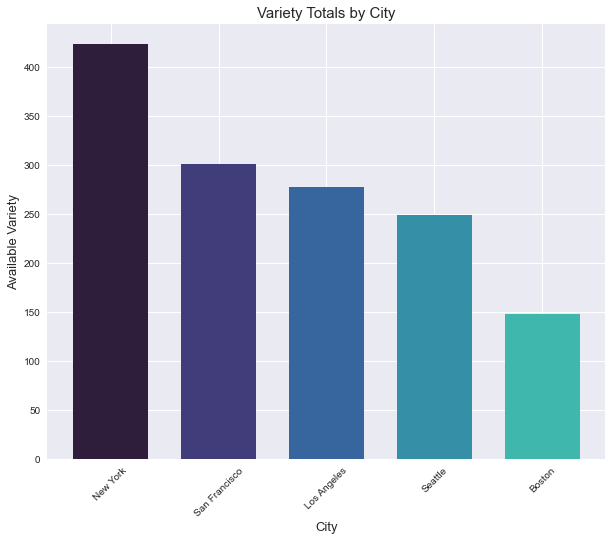

In [13]:
#Generate a bar graph showing variety totals for each city
plot_sums = plot_sum.sort_values(ascending = False)

#Our Color Pallet
palette = list((sns.color_palette("mako", as_cmap=False)))
fig = plt.figure(figsize=(10,8))

#Regular bargraph
bar = plt.bar(plot_sums.index , plot_sums.values , color = palette , width = .7 , align = "center")
plt.title("Variety Totals by City" , size = 15)
plt.xlabel("City",size=13)
plt.ylabel("Available Variety",size=13)
plt.xticks(rotation = 45)
plt.savefig("figures/fig1.PNG")
plt.show()

## It Works!

Code below works, but not sure why I keep getting an indexerror? It exports my gif perfectly everytime to my desired folder and the animation is exactly how I wanted it with no bug issues affecting it. I dont like seeing the indexerror pop up BUT given the timeframe of this project I'm going to go ahead and run with it since it does in fact output my gif correctly.

In [ ]:
#Giving the figure a size and formatting our graph area
fig = plt.figure(figsize=(11,9))
axes = fig.add_subplot()
axes.set_ylim(0, 500)
plt.style.use("seaborn")

#This is the increments at which the animated graph moves by (all had to be the same as the gif uses whichever list has the least)
lst1=[0, 10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 423]
lst2=[0, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 301]
lst3=[0, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 277]
lst4=[0, 10, 28, 46, 64, 82, 100, 118, 136, 154, 172, 190, 208, 226, 244, 249]
lst5=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 148]


#storing the list to later call on it for the animation
y1, y2, y3, y4, y5 = [], [], [], [], []
def animate(i):
    y1=lst1[i]
    y2=lst2[i]
    y3=lst3[i]
    y4=lst4[i]
    y5=lst5[i]
    
    #this is a regular bar gragh plotting in matplotlib
    plt.bar(["New York", "San Francisco" , "Los Angeles" , "Seattle" , "Boston"], [y1,y2,y3,y4,y5], color=palette)
    
 #adding our labels   
plt.title("Variety Totals by City", size = 20)
plt.xlabel("City",size=15)
plt.ylabel("Available Variety",size=15)
plt.xticks(rotation = 40)

#giving our gif its frames per second and intervals and exporting it out
ani = FuncAnimation(fig, animate, interval=1000)
writergif = animation.PillowWriter(fps=2)
ani.save("figures/variety_animated.gif", writer=writergif)

### Read Cells Above